# Sentiment analysis using VADER

VADER means Valence Aware Dictionary and sEntiment Reasoner. VADER is a rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media.

VADER belongs to a kind of sentiment analysis that depends on lexicons of sentiment-related words. In this methodology, every one of the words in the vocabulary is appraised with respect to whether it is positive or negative, and, how +ve or -ve. An overall score for the sentence is then calculated by combining the sentiment scores associated with each of the individual tokens within the sentence.

Useful tutorial on the use of Vader for sentiment analysis: https://www.analyticsvidhya.com/blog/2021/06/vader-for-sentiment-analysis/

In [2]:
import pandas as pd
import numpy as np

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

### Load the cleaned dataset we created in ```3_NLP_clean_data.ipynb```

In [3]:
tweet_data = pd.read_csv('data_lg_clean.csv')
tweet_data = tweet_data.dropna()
tweet_data.head()

/var/folders/87/clmyfqwn0kz2jfcyp0cbjycc0000gn/T/ipykernel_33769/721015313.py:1: DtypeWarning: Columns (0,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  tweet_data = pd.read_csv('data_lg_clean.csv')


,tweet_id,created_at,tweet,like_count,quote_count,reply_count,retweet_count,clean,hashtags
0,1551734038204923904,2022-07-26 00:59:59+00:00,$2.7 billion for climate change (slashing carb...,15.0,1.0,0,6,27 billion climate change slash carbon emissio...,[]
1,1551734021591269377,2022-07-26 00:59:55+00:00,@nathaliejacoby1 Climate change. The rise in t...,2.0,0.0,0,0,climate change rise temperature bad secondary ...,[]
2,1551734013815029761,2022-07-26 00:59:53+00:00,@JacobsVegasLife @LasVegasLocally This is a ch...,8.0,0.0,1,0,chill podcast happen salt lake city great salt...,[]
3,1551733993740980224,2022-07-26 00:59:48+00:00,Climate Change and Energy Minister Chris Bowen...,18.0,0.0,8,5,climate change energy minister chris bowen hit...,[]
4,1551733979316887554,2022-07-26 00:59:45+00:00,"@Thebs15800518 At 5:30, @SecGranHolm tries to ...",0.0,0.0,0,0,530 try hide fact begin sign legislation shut ...,"['#biden', '#oil', '#buildbackbetter']"


### Sentiment analysis 

Create a function that takes a sentence and returns a dictionary containing the following sentiment information:
 - ```pos```, ```neu```, and ```neg``` scores which are ratios for proportions of text that fall in each category
 - ```compound``` which is the score which reflects the overall sentiment of the sentence. It is computed by summing the valence scores of each word in the lexicon, adjusted according to the sentiment rules of the model, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive).

In [4]:
def sentiment_scores(sentence):
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(sentence)
    return sentiment_dict

For example...

In [5]:
print(tweet_data['clean'].iloc[1])
sentiment_scores(tweet_data['clean'].iloc[1])

climate change rise temperature bad secondary consequence famine disease war global political economic instability terrify epic scale


{'neg': 0.433, 'neu': 0.567, 'pos': 0.0, 'compound': -0.8934}

Calculate sentiment scores for every row in the dataframe

In [6]:
tweet_data['tmp'] = tweet_data['tweet'].apply(lambda x: sentiment_scores(x))
tweet_data['neg'] = tweet_data['tmp'].apply(lambda x: x['neg'])
tweet_data['pos'] = tweet_data['tmp'].apply(lambda x: x['pos'])
tweet_data['neu'] = tweet_data['tmp'].apply(lambda x: x['neu'])
tweet_data['compound'] = tweet_data['tmp'].apply(lambda x: x['compound'])

In [13]:
tweet_data.head()

,tweet_id,tweet,like_count,quote_count,reply_count,retweet_count,clean,hashtags,tmp,neg,pos,neu,compound,sentiment
created_at,,,,,,,,,,,,,,
2022-07-26 00:59:59+00:00,1551734038204923904,$2.7 billion for climate change (slashing carb...,15.0,1.0,0,6,27 billion climate change slash carbon emissio...,[],"{'neg': 0.057, 'neu': 0.818, 'pos': 0.124, 'co...",0.057,0.124,0.818,0.5362,pos
2022-07-26 00:59:55+00:00,1551734021591269377,@nathaliejacoby1 Climate change. The rise in t...,2.0,0.0,0,0,climate change rise temperature bad secondary ...,[],"{'neg': 0.311, 'neu': 0.689, 'pos': 0.0, 'comp...",0.311,0.000,0.689,-0.9280,neg
2022-07-26 00:59:53+00:00,1551734013815029761,@JacobsVegasLife @LasVegasLocally This is a ch...,8.0,0.0,1,0,chill podcast happen salt lake city great salt...,[],"{'neg': 0.026, 'neu': 0.911, 'pos': 0.063, 'co...",0.026,0.063,0.911,0.3612,pos
2022-07-26 00:59:48+00:00,1551733993740980224,Climate Change and Energy Minister Chris Bowen...,18.0,0.0,8,5,climate change energy minister chris bowen hit...,[],"{'neg': 0.047, 'neu': 0.822, 'pos': 0.132, 'co...",0.047,0.132,0.822,0.4767,pos
2022-07-26 00:59:45+00:00,1551733979316887554,"@Thebs15800518 At 5:30, @SecGranHolm tries to ...",0.0,0.0,0,0,530 try hide fact begin sign legislation shut ...,"['#biden', '#oil', '#buildbackbetter']","{'neg': 0.122, 'neu': 0.878, 'pos': 0.0, 'comp...",0.122,0.000,0.878,-0.5106,neg


The compound score can be used to classify into different sentiments with these recommended thresholds:
- <b>negative</b>: ```compound``` < -0.05
- <b>neutral</b>: -0.05 < ```compound``` < 0.05
- <b>positive</b>: ```compound``` > -0.05

In [7]:
tweet_data["sentiment"] = np.select(
    [tweet_data["compound"] < -0.05, (tweet_data["compound"] < 0.05) & (tweet_data["compound"] > -0.05), tweet_data["compound"] > 0.05],
    ['neg', 'neu', 'pos']
)

### Create data subsets based on tweets overall sentiment

In [9]:
pos_df = tweet_data[tweet_data['sentiment']=='pos']
neg_df = tweet_data[tweet_data['sentiment']=='neg']
neu_df = tweet_data[tweet_data['sentiment']=='neu']

### Plot the numnber of tweets with each sentiment on each day

In [8]:
tweet_data = tweet_data[tweet_data['created_at']!='0']
tweet_data['created_at'] = pd.to_datetime(tweet_data['created_at'], format="%Y-%m-%d %H:%M:%S")
tweet_data = tweet_data.set_index('created_at')

In [10]:
pos = pos_df.resample('D').agg('count')['tweet']
neg = neg_df.resample('D').agg('count')['tweet']
neu = neu_df.resample('D').agg('count')['tweet']

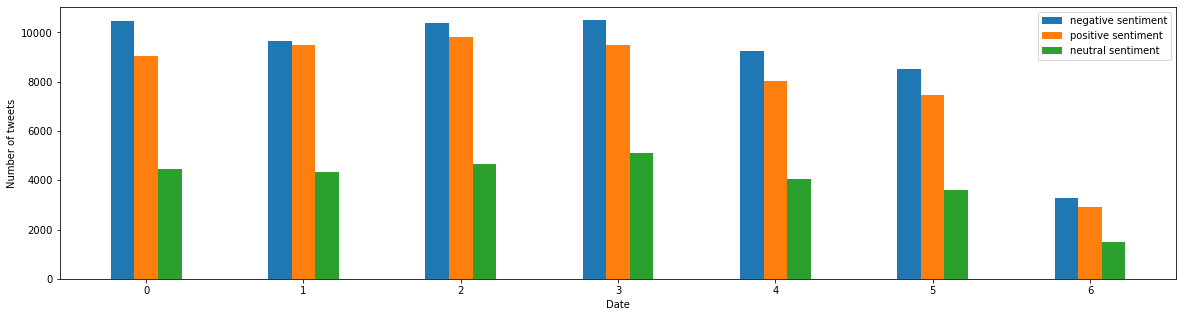

In [11]:
import matplotlib.pyplot as plt
width = 0.3
plt.bar(np.arange(len(neg))-width/2, neg, width=width/2,label='negative sentiment')
plt.bar(np.arange(len(pos)), pos, width=width/2, label='positive sentiment')
plt.bar(np.arange(len(neu))+width/2, neu, width=width/2, label='neutral sentiment')
plt.legend()
plt.ylabel('Number of tweets')
plt.xlabel('Date')
plt.gcf().set_size_inches(20,5)

### Create wordclouds for each of the different sentiment subsets

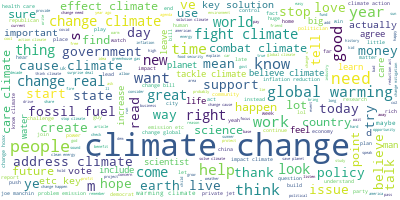

In [16]:
from nltk.tokenize import word_tokenize

words = ','.join(pos_df['clean'].apply(lambda x: word_tokenize(x)).sum())
wordcloud = WordCloud(background_color='white', max_words=500, contour_width=3, contour_color='steel_blue')
wordcloud.generate(words)
wordcloud.to_image()

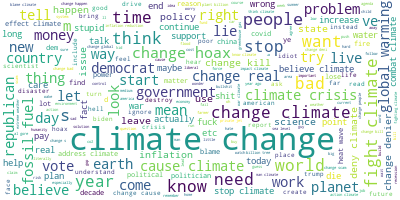

In [17]:
words = ','.join(neg_df['clean'].apply(lambda x: word_tokenize(x)).sum())
wordcloud = WordCloud(background_color='white', max_words=500, contour_width=3, contour_color='steel_blue')
wordcloud.generate(words)
wordcloud.to_image()

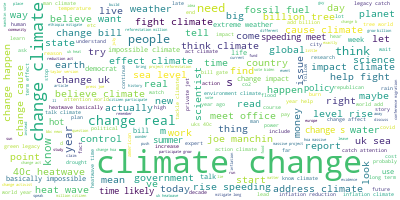

In [18]:
words = ','.join(neu_df['clean'].apply(lambda x: word_tokenize(x)).sum())
wordcloud = WordCloud(background_color='white', max_words=500, contour_width=3, contour_color='steel_blue')
wordcloud.generate(words)
wordcloud.to_image()

### Functions

In [7]:
import emoji
def clean_hashtags(tag):
    # make all tweet text lower case 
    tag = tag.lower()

    # remove any links from tweets 
    tag = re.sub(r'https?:\/\/\S+', '', tag)

    # remove new line 
    tag = re.sub(r'\n', '', tag)

    # remove any emojis
    tag = emoji.replace_emoji(tag, replace='')
    
    # Remove punctuation, URLS and @mentions
    tag = re.sub(r"(@\S+)|(#\S+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", tag)
    return tag

In [23]:
def plot_common(words, title):
    word_list = [x[0] for x in words]
    word_freq = [x[1] for x in words]
    
    fig, ax = plt.subplots(figsize = (8,8))
    y_pos = np.arange(len(word_list))
    ax.barh(y_pos ,list(word_freq)[::-1], align='center', color='steelblue', edgecolor='black', linewidth=1)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(list(word_list)[::-1])
    ax.set_xlabel("Number of appereances")
    ax.set_title(title, fontsize = 20)
    plt.tight_layout(pad=3)
    plt.show()

In [27]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
def find_common_words(df):
    words = df['clean_spacy'].apply(lambda x: word_tokenize(x)).sum()  
    fdist = FreqDist(words)
    return fdist.most_common(15)

In [24]:
from collections import Counter
import ast
import re
def find_common_hashtags(df):
    df_copy = df.copy()
    df_copy['hashtags'] = df_copy['hashtags'].apply(lambda x: ast.literal_eval(x))
    all_hashtags = sum([tag.split('#') for tag in df_copy['hashtags'].sum()], [])
    all_hashtags = [clean_hashtags(tag) for tag in all_hashtags if tag]  # removes empty strings from splitting hashtags

    top_hashtags = Counter(all_hashtags).most_common(10)
    
    return top_hashtags

### Common hashtags for different sentiments

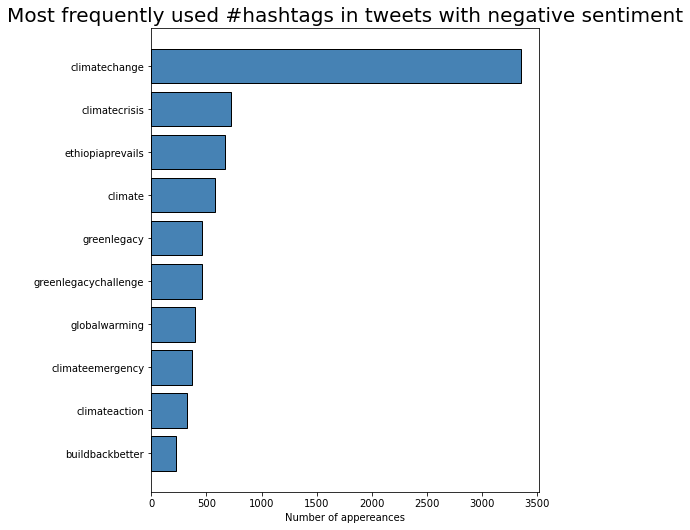

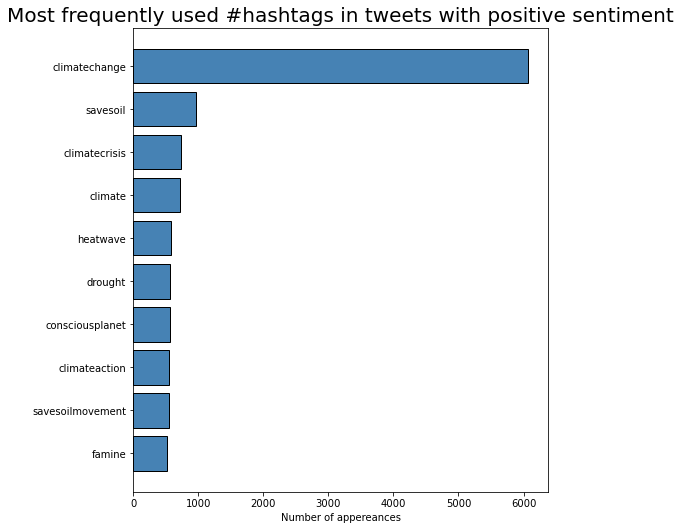

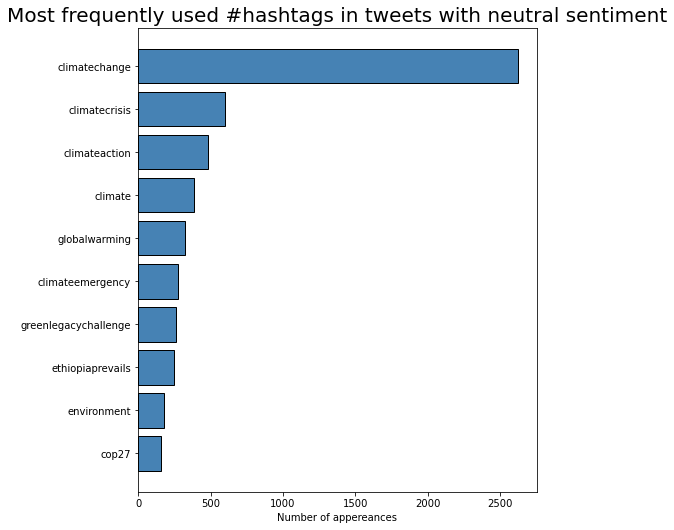

In [26]:
common_hashtags_neg = find_common_hashtags(neg_df)
plot_common(common_hashtags_neg, 'Most frequently used #hashtags in tweets with negative sentiment')

common_hashtags_pos = find_common_hashtags(pos_df)
plot_common(common_hashtags_pos, 'Most frequently used #hashtags in tweets with positive sentiment')

common_hashtags_neu = find_common_hashtags(neu_df)
plot_common(common_hashtags_neu, 'Most frequently used #hashtags in tweets with neutral sentiment')

### Common words for each sentiment

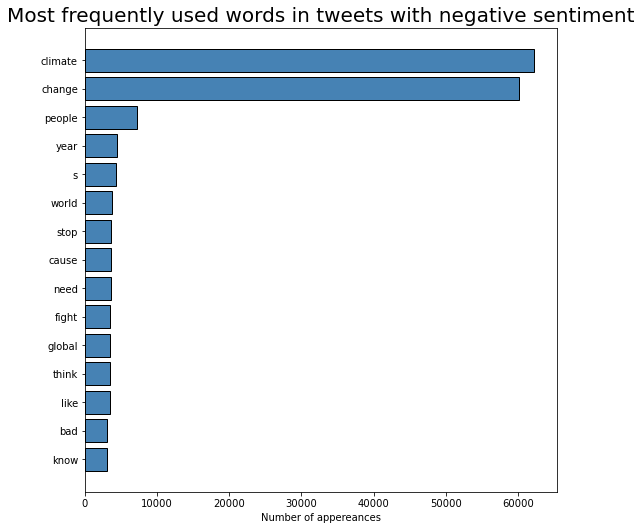

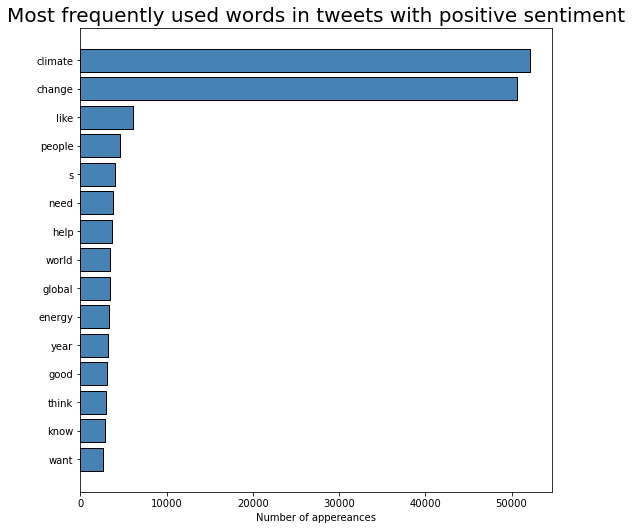

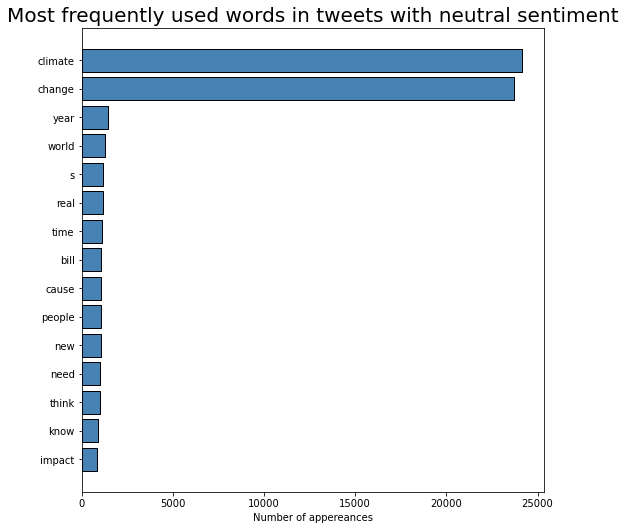

In [39]:
common_words_neg = find_common_words(neg_df)
plot_common(common_words_neg, 'Most frequently used words in tweets with negative sentiment')

common_words_pos = find_common_words(pos_df)
plot_common(common_words_pos, 'Most frequently used words in tweets with positive sentiment')

common_words_neu = find_common_words(neu_df)
plot_common(common_words_neu, 'Most frequently used words in tweets with neutral sentiment')

### Save dataframe with sentiment columns included

In [12]:
tweet_data.to_csv('data_lg_clean_sentiment.csv')